## Bussiness Goal:



 Build and train a regression model on the Capital Bike Share (Washington, D.C.) Kaggle data set, in order to predict demand for bicycle rentals at any given hour, based on time and weather, e.g.:

 “Given the forecasted weather conditions, how many bicycles can we expect to be rented out (city-wide) this Saturday at 2pm?”

1. Split the data into a training and test set.
2. Conduct an exploratory data analysis.
3. Train a regression model.
4. Iteratively optimize the model by expanding or selecting features.
5. Regularize the model to avoid overfitting.
6. Calculate a RMSLE for the training and test set.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.linear_model import PoissonRegressor


from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_log_error

df = pd.read_csv('train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [2]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [3]:
#drop casual and registered
df.drop(['casual', 'registered'], axis=1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
df['hour'] = df['datetime'].dt.hour
df['day']= df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df["dayofweek"] = df["datetime"].dt.dayofweek
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,19,12,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,19,12,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,19,12,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,19,12,2


### EDA
Start by looking the correlation between independent variables numerical and categorical.

<AxesSubplot:>

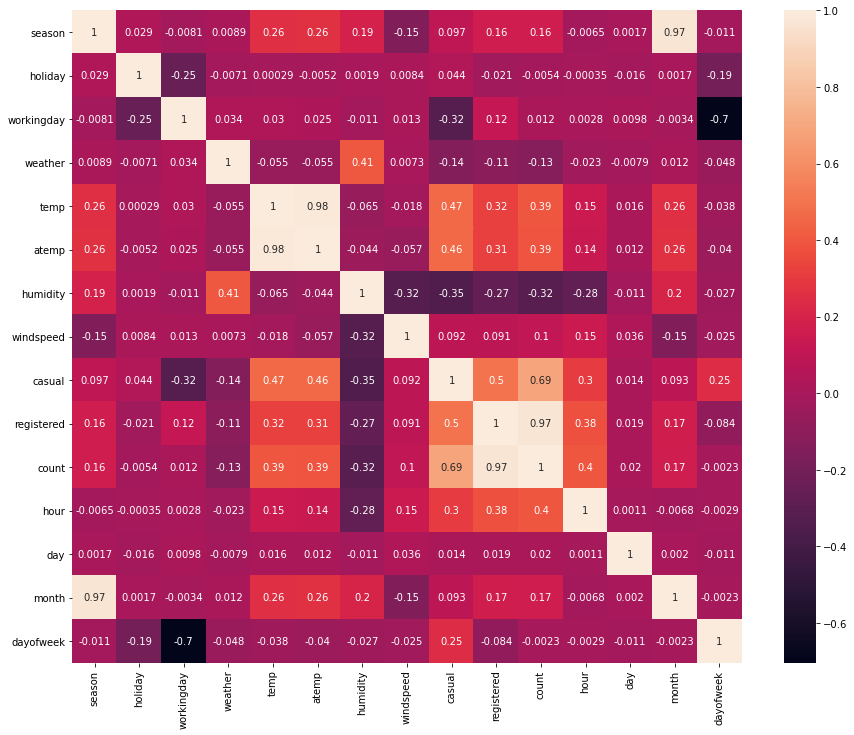

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

Inspect the independent variables. 
If there is big correlation take them out because of multicollinearity.If they interact non linearly engineer new features that expose these interactions either with polynomial features or multiplying features with one other.

<Figure size 1080x720 with 0 Axes>

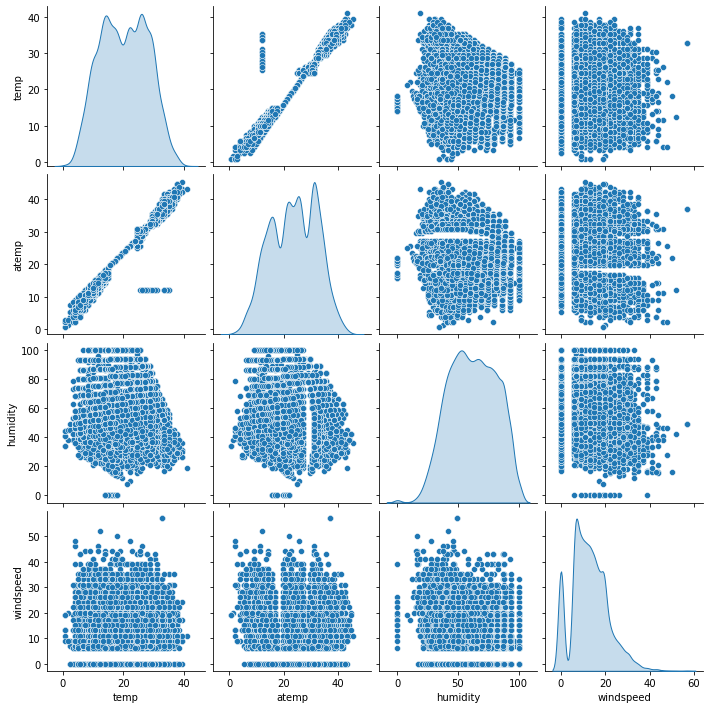

In [8]:
#pairlot to find correlations between possible input features.
df_1 = df[['temp', 'atemp', 'humidity', 'windspeed']]
plt.figure(figsize=(15,10))
sns.pairplot(df_1, diag_kind='kde')

From here we understand that temp and atemp are correlated. So we won't use both for our input data

<AxesSubplot:xlabel='humidity', ylabel='count'>

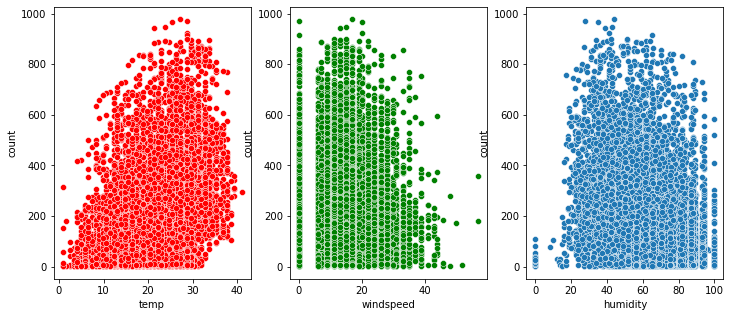

In [9]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.scatterplot(x="temp", y="count", data=df,ax=ax1,color='r')
sns.scatterplot(x="windspeed", y="count", data=df,ax=ax2, color='g')
sns.scatterplot(x="humidity", y="count", data=df,ax=ax3)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

<AxesSubplot:xlabel='hour', ylabel='count'>

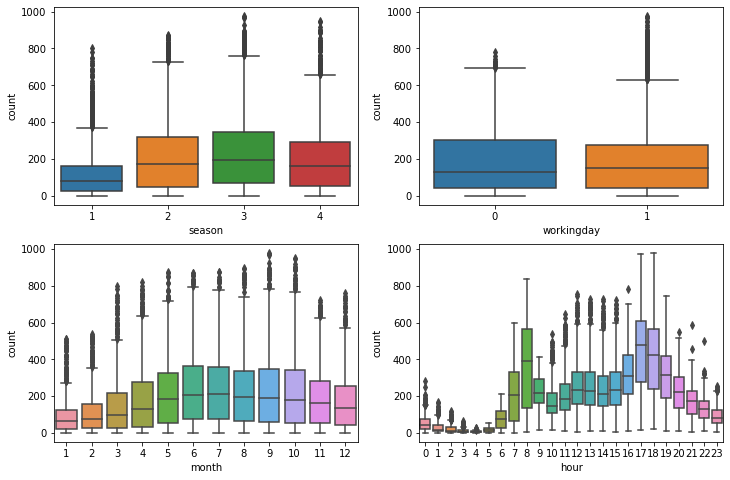

In [10]:
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 8)
sns.boxplot('season','count', data=df,ax=axes[0][0])
sns.boxplot('workingday','count', data=df,ax=axes[0][1])
sns.boxplot('month','count', data=df,ax=axes[1][0])
sns.boxplot('hour','count', data=df, ax=axes[1][1])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

<AxesSubplot:xlabel='hour', ylabel='count'>

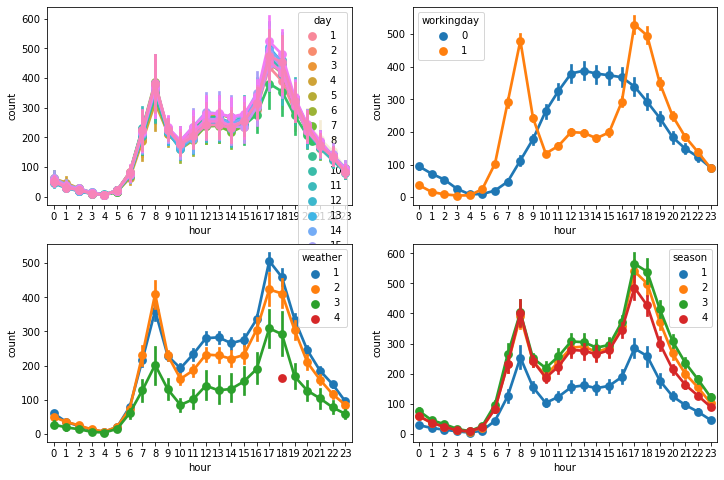

In [11]:
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 8)
sns.pointplot('hour', 'count', data=df, hue='day', ax=axes[0][0])
sns.pointplot('hour', 'count', data=df, hue='workingday', ax=axes[0][1])
sns.pointplot('hour', 'count', data=df, hue='weather', ax=axes[1][0])
sns.pointplot('hour', 'count', data=df, hue='season', ax=axes[1][1])

[Text(0.5, 1.0, 'Season with hourly distribution of counts')]

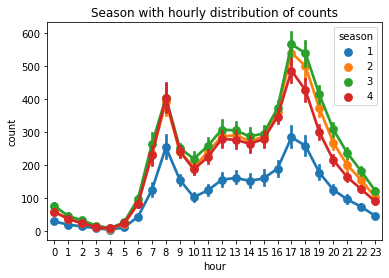

In [12]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['hour','count','season']],x='hour',y='count',
              hue='season',ax=ax)
ax.set(title="Season with hourly distribution of counts")

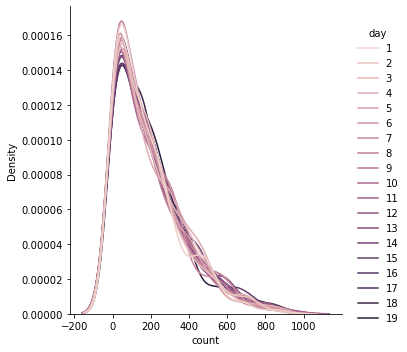

In [13]:
sns.displot(data=df, x='count', hue='day', kind="kde")

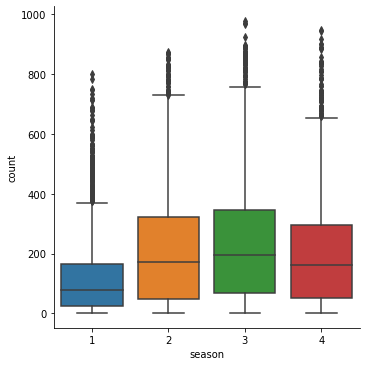

In [14]:
sns.catplot(x='season', y='count', data= df, kind='box')

[Text(0.5, 1.0, 'Monthly distribution of counts')]

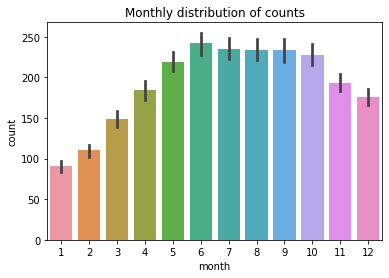

In [15]:
fig,ax = plt.subplots()
sns.barplot(data=df[['month','count']],x='month',y='count',
              ax=ax)
ax.set(title="Monthly distribution of counts")

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

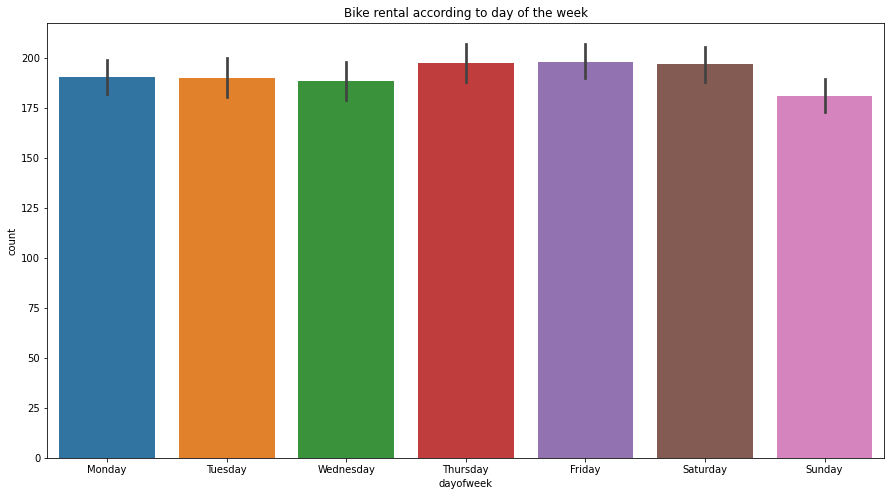

In [16]:
plt.figure(figsize=(15,8))
weather_barplot = sns.barplot(x='dayofweek', y='count', data = df)
weather_barplot.set(title = 'Bike rental according to day of the week')
weather_barplot.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

[Text(0, 0, 'Clear'),
 Text(1, 0, 'Cloudy'),
 Text(2, 0, 'Light Snow, Light Rain'),
 Text(3, 0, 'Heavy Rain')]

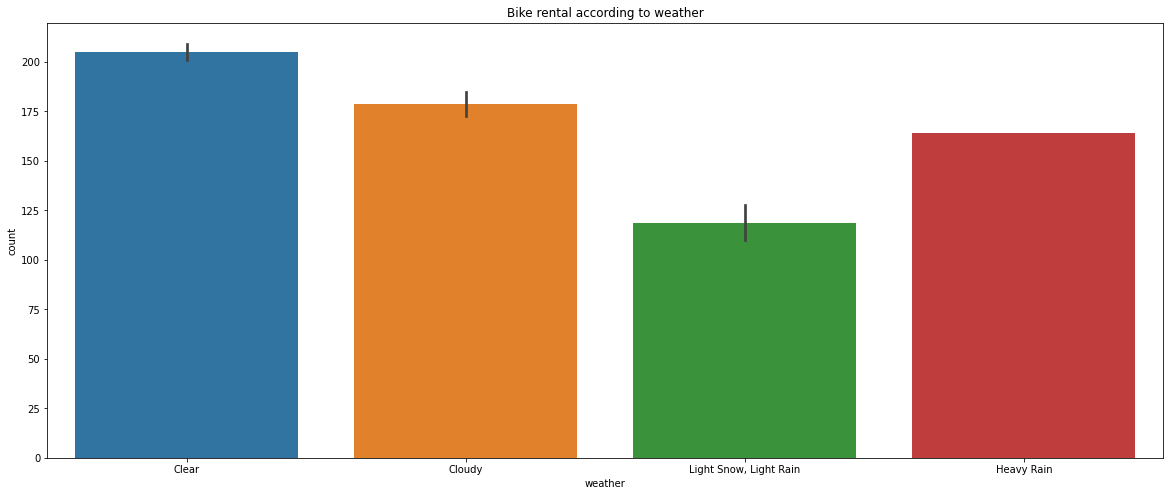

In [18]:
plt.figure(figsize=(20,8))
season_barplot = sns.barplot(x='weather', y='count', data = df)
season_barplot.set(title = 'Bike rental according to weather')
season_barplot.set_xticklabels(['Clear', 'Cloudy', 'Light Snow, Light Rain', 'Heavy Rain'])

<b> Conclusions: </b>

Temp, atemp are from the weather column to be calculated so we take them out 
Windspeed...
Hour day month season important, years no!
Between these features: we can detect high correlation therefor we take them out, as well as humidity.
Hour and month but nevertheless are both kept.

High season: Mai bis Oktober. 

At the pointplot was clear that in these hours there is an increased demand on renting bikes therefore a column is created. The same could be applied for the days and months. The seasons remain as given.

Create more columns.

In [19]:
df['rush_hour'] = ((df['datetime'].dt.hour >= 15) & (df['datetime'].dt.hour <= 20)).astype(int)
#df['not_renting_hours'] = ((df['datetime'].dt.hour >= 21) | (df['datetime'].dt.hour <= 23)).astype(int)

In [20]:
#df['high_season_months']  = 

<b> Feature Selection. </b>

Here trying different methods. Trying to figure out how they work.

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k='all')

#sel.fit(X,y)

<b> Feature Engineering. <b>

Select input features and split the data before.

In [ ]:
X = df[['season', 'temp', 'weather', 'hour', 'day', 'month', 'workingday', 'rush_hour','holiday'
     ]]
#Use the logarithm here
y_feat = df[['count']]
y = np.log(1 + y_feat)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
trans = ColumnTransformer([
    
    ('encode', OneHotEncoder(sparse=False, drop='first'),
     ['day', 'rush_hour','holiday', 'workingday',
                                                'month', 'hour']),
    ('ploy, scale', make_pipeline(
     PolynomialFeatures(degree=5, include_bias=False)),
     ['workingday', 'month', 'hour', 'holiday']),
    
     ('plot by interacting', make_pipeline(
    PolynomialFeatures(interaction_only=True, include_bias=False)),
    ['season', 'rush_hour']),
     
     ('plot by interacting_2', make_pipeline(
    PolynomialFeatures(interaction_only=True, include_bias=False)),
    ['day', 'rush_hour']),
     
     ])

In [ ]:
scaled = make_pipeline(
       trans,
       MinMaxScaler(),
)
scaled.fit(X_train)
X_trans = scaled.transform(X_train)
X_trans

In [ ]:
#should i transform the X_test?
scaled.fit(X_test)
X_test = scaled.transform(X_test)

Make a pipelne with your model and the trans Data plus a MinMax Scaler,
that is needed always after using polynomial on features.
Use this to use for all model in for loop.

<b> Linear Regression </b>

In [ ]:
lr = LinearRegression()
lr.fit(X_trans, y_train)
lr.score(X_trans, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
ypred = lr.predict(X_trans)
ypred_test = lr.predict(X_test)

<b> Evaluation Metrics. </b>


In [ ]:
def RMSLE(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
#def calculate_evaluation_metrics(ypred, ytest, model):

Use the exp() function here, if the log() was used before for the y data. For the r2 not needed.


In [ ]:
print ('MSE for train data: ', np.sqrt(mean_squared_log_error((np.exp(y_train)-1), (np.exp(ypred)-1))))
print ('MSE for test data: ', np.sqrt(mean_squared_log_error((np.exp(y_test)-1), (np.exp(ypred_test)-1))))
print ('RMSLE for train data', RMSLE((np.exp(y_train)-1), (np.exp(ypred)-1)))
print ('RMSLE for test data:', RMSLE((np.exp(y_test)-1), (np.exp(ypred_test)-1)))
print('R_2 score for train data:',r2_score(y_train,ypred))
print('R_2 score for test data:',r2_score(y_test,ypred_test))

In [ ]:
ypred.shape

In [ ]:
sns.set_theme(style="whitegrid")
x = np.exp(ypred)-1
y = np.exp(y_train)-1
sns.residplot(x=x, y=y, lowess=True, color="g")

In [ ]:
sns.set_theme(style="whitegrid")
x = np.exp(ypred_test)-1
y = np.exp(y_test)-1
sns.residplot(x=x, y=y, lowess=True, color="g")

In [ ]:
#FIXME
pr = PoissonRegressor()
pr.fit(X_trans, y_train)
#pr.score(X_trans, y_train)

<b> Random Forest Regressor </b>

To inspect the feature importance.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
rfr.fit(X_trans, y_train)
rfr.score(X_trans, y_train)

In [ ]:
rfr.feature_importances_
#TODO : mapping with labels

In [ ]:
ypred_rfr = rfr.predict(X_trans)
ypred_test_rfr = rfr.predict(X_test)
ypred_test_rfr.shape

In [ ]:
print ('MSE for train data: ', np.sqrt(mean_squared_log_error((np.exp(y_train)-1), (np.exp(ypred_rfr)-1))))
print ('MSE for test data: ', np.sqrt(mean_squared_log_error((np.exp(y_test)-1), (np.exp(ypred_test_rfr)-1))))
print ('RMSLE for train data', RMSLE((np.exp(y_train)-1), (np.exp(ypred_rfr)-1)))
print ('RMSLE for test data:', RMSLE((np.exp(y_test)-1), (np.exp(ypred_test_rfr)-1)))
print('R_2 score for train data:',r2_score(y_train,ypred_rfr))
print('R_2 score for test data:',r2_score(y_test,ypred_test_rfr))

In [ ]:
sns.set_theme(style="whitegrid")
x = np.exp(ypred_rfr)-1
y = np.exp(y_train)-1
sns.residplot(x=x, y=y, lowess=True, color="g")

In [ ]:
sns.set_theme(style="whitegrid")
x = np.exp(ypred_test_rfr)-1
y = np.exp(y_test)-1
sns.residplot(x=x, y=y, lowess=True, color="g")

<b> Elastic Net </b>

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

eln = ElasticNet()
parameters = {'max_iter': [1, 5, 10],
                  'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  'l1_ratio': np.arange(0.0, 1.0, 0.1)}
grid = GridSearchCV(eln, parameters, scoring='r2', cv=5)

#eln = ElasticNet(alpha=2.0, l1_ratio=0, fit_intercept=True, selection='random')
#eln.fit(X_trans, y_train)
#eln.predict(X_trans).mean()

grid.fit(X_trans, y_train)
Y_pred = grid.predict(X_test)

In [ ]:
#eln.score(X_trans, y_train)#R2

In [ ]:
ypred_eln = eln.predict(X_trans)
ypred_eln_test = eln.predict(X_test)

print ('MSE for train data: ', np.sqrt(mean_squared_log_error((np.exp(y_train)-1), (np.exp(ypred_eln)-1))))
print ('MSE for test data: ', np.sqrt(mean_squared_log_error((np.exp(y_test)-1), (np.exp(ypred_eln_test)-1))))
print ('RMSLE for train data', RMSLE((np.exp(y_train)-1), (np.exp(ypred_eln)-1)))
print ('RMSLE for test data:', RMSLE((np.exp(y_test)-1), (np.exp(ypred_eln_test)-1)))
print('R_2 score for train data:',r2_score(y_train,ypred_eln))
print('R_2 score for test data:',r2_score(y_test,ypred_eln_test))